In [11]:
pip install seaborn

     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     ------------ ------------------------- 112.6/341.8 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 341.8/341.8 kB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---------------------------------------- 294.6/294.6 kB 8.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   - -------------------------------------- 0.4/10.8 MB 7.6 MB/s eta 0:00:02
   - -------------------------------------- 0.5/10.8 MB 6.4 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/10.8 MB 9.8 MB/s eta 0:00:01
   ------ --------------------------------- 1.7/10.8 MB 9.6 MB/s eta 0:00:01
   ------- -------------------------------- 2.0/10.8 MB 9.3 MB/s eta 0:00:01
   -------- ------------------------------- 2.3/10.8 MB 8.8 MB/s eta 0:00:01
   -------- ------------------------------- 2.3/10.8 MB 8.8 MB/s eta 0:00:01
   ----

In [7]:
import numpy as np
import torch
import networkx as nx
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
from matplotlib import colors
plt.rcParams.update({'font.size': 16})


from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures


# Basic network statistics




In [2]:
# Load the Cora dataset
dataset = Planetoid(root='.', name='Cora')

# Access the first graph in the dataset
data = dataset[0]

# Convert edge_index to a NetworkX graph
G = nx.Graph()
edges = data.edge_index.t().numpy()
G.add_edges_from(edges)

# Print basic details of the graph
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Number of features: {data.num_features}')
print(f'Number of classes: {dataset.num_classes}')

# Calculate and print density
density = nx.density(G)
print(f'Density: {density}')





Number of nodes: 2708
Number of edges: 10556
Number of features: 1433
Number of classes: 7
Density: 0.0014399999126942077


Average Degree: 3.8980797636632203
Average Clustering Coefficient: 0.2406732985019374


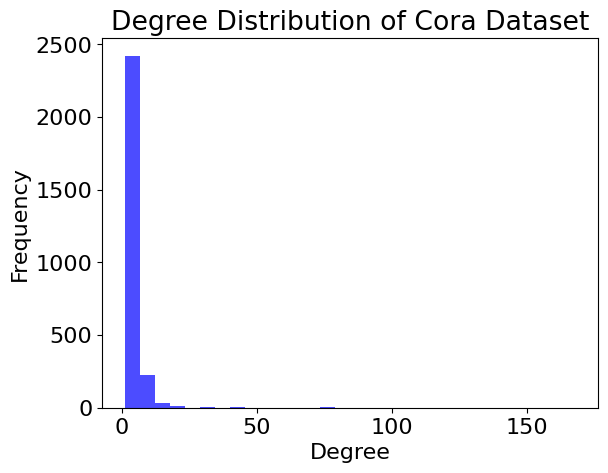

In [3]:
#Calculate average degree of a network
average_degree = sum(dict(G.degree()).values()) / len(G)

print(f'Average Degree: {average_degree}')

# Calculate average clustering coefficient
average_clustering_coefficient = nx.average_clustering(G)

print(f'Average Clustering Coefficient: {average_clustering_coefficient}')

degrees = dict(G.degree())

# Plot degree distribution
plt.hist(list(degrees.values()), bins=30, color='blue', alpha=0.7)
plt.title('Degree Distribution of Cora Dataset')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

It is clear that node degree is very low 3.9 and we will check the overall distribution




---


## Node centralities


In [8]:
# Compute Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Compute Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Print centrality measures for the first few nodes
print("Node\tDegree Centrality\tBetweenness Centrality")
for node in list(G.nodes())[:5]:
    print(f"{node}\t{degree_centrality[node]:.4f}\t\t\t{betweenness_centrality[node]:.4f}")



Node	Degree Centrality	Betweenness Centrality
0	0.0011			0.0000
633	0.0011			0.0003
1862	0.0015			0.0012
2582	0.0011			0.0002
1	0.0011			0.0011


Degree Centrality:
Node 1862 stands out with a degree centrality of 0.0015, indicating a notable connection to a larger number of nodes in the citation network. This suggests that the document associated with Node 1862 is cited more frequently within the dataset, implying a heightened visibility and influence. It likely represents a pivotal work that serves as a frequent reference point for other papers.

Betweenness Centrality:
Examining Node 1862 further, its betweenness centrality of 0.0012 suggests its presence on many of the shortest paths between other nodes in the network. This document assumes the role of a bridge or intermediary in the citation network, playing a crucial part in connecting disparate research clusters or topics. This underscores a potentially interdisciplinary nature.

Node 1 also exhibits non-negligible betweenness centrality at 0.0011, akin to Node 1862. Like Node 1862, Node 1 acts as a connecting point in the network, facilitating the flow of information between different parts of the dataset.

Overall Implications:
Nodes with high degree centrality, such as Node 1862, are frequently cited and possess extensive connections within the network, indicating their potential as influential works. On the other hand, nodes with high betweenness centrality, like Nodes 1862 and 1, serve as crucial bridges, linking various parts of the network. These nodes likely represent documents central to the cohesion of the research field depicted by the Cora dataset.

All in all, nodes with high centrality in the Cora citation network play a pivotal role as influential papers, frequently cited (high degree centrality), and as connecting points between different research clusters (high betweenness centrality). Their significance lies in shaping the flow of information within the academic field represented by the Cora dataset.

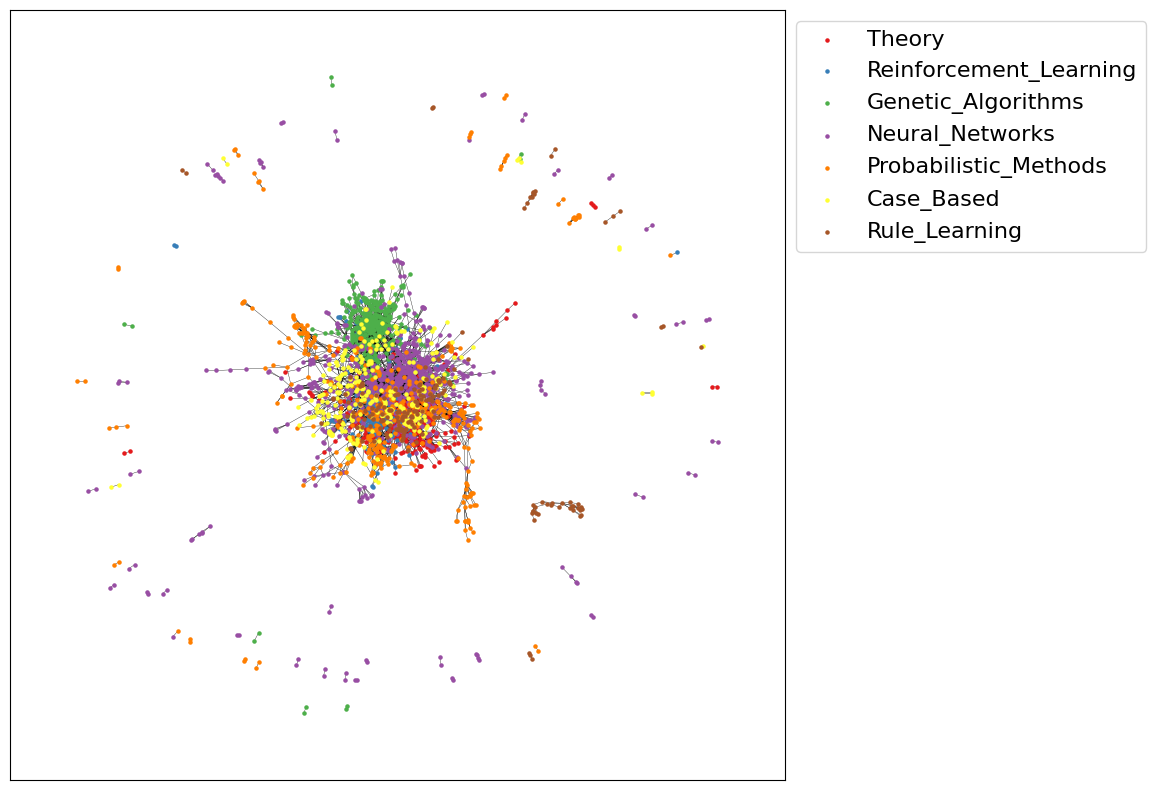

In [9]:
label_dict = {
    0: "Theory",
    1: "Reinforcement_Learning",
    2: "Genetic_Algorithms",
    3: "Neural_Networks",
    4: "Probabilistic_Methods",
    5: "Case_Based",
    6: "Rule_Learning"}
data.y[:10]

G = to_networkx(data, to_undirected=True)
node_color = []
nodelist = [[], [], [], [], [], [], []]
colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628']
labels = data.y
for n, i in enumerate(labels):
    node_color.append(colorlist[i])
    nodelist[i].append(n)
pos = nx.spring_layout(G, seed = 42)
plt.figure(figsize = (10, 10))
labellist = list(label_dict.values())
for num, i in enumerate(zip(nodelist, labellist)):
    n, l = i[0], i[1]
    nx.draw_networkx_nodes(G, pos, nodelist=n, node_size = 5, node_color = colorlist[num], label=l)
nx.draw_networkx_edges(G, pos, width = 0.25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

Node Connectivity

{3: 818, 4: 426, 0: 351, 2: 418, 1: 217, 5: 298, 6: 180}


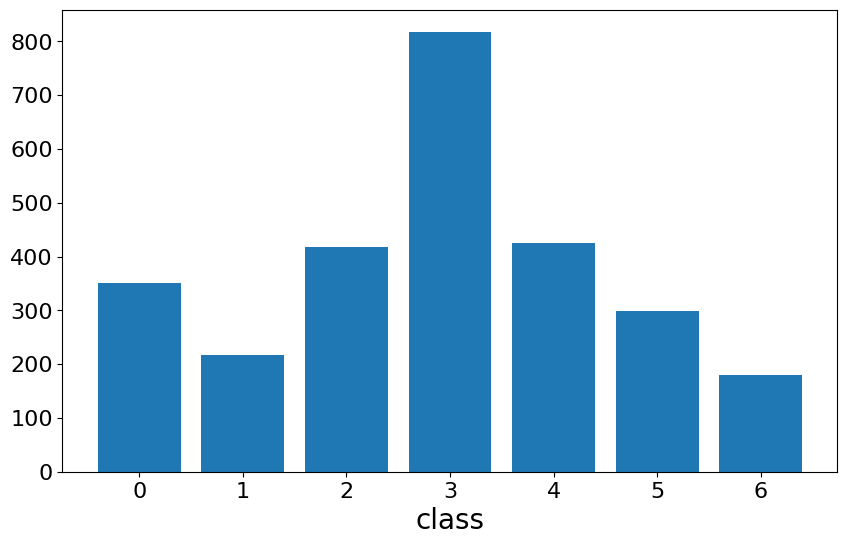

In [12]:
import collections
import seaborn as sns

counter = collections.Counter(data.y.numpy())
counter = dict(counter)
print(counter)
count = [x[1] for x in sorted(counter.items())]
plt.figure(figsize=(10, 6))
plt.bar(range(7), count)
plt.xlabel("class", size=20)
plt.show()

label: 0
1527 edges
{0: 1068, 1: 32, 3: 161, 6: 80, 5: 75, 4: 88, 2: 23}
label: 1
1029 edges
{1: 818, 3: 67, 0: 32, 5: 28, 2: 62, 4: 20, 6: 2}
label: 2
1826 edges
{2: 1654, 3: 53, 1: 62, 5: 30, 0: 23, 4: 2, 6: 2}
label: 3
2838 edges
{3: 2350, 2: 53, 4: 137, 5: 54, 0: 161, 6: 16, 1: 67}
label: 4
1592 edges
{4: 1320, 3: 137, 0: 88, 1: 20, 6: 6, 5: 19, 2: 2}
label: 5
1086 edges
{2: 30, 5: 834, 0: 75, 3: 54, 1: 28, 4: 19, 6: 46}
label: 6
658 edges
{6: 506, 5: 46, 0: 80, 4: 6, 3: 16, 1: 2, 2: 2}


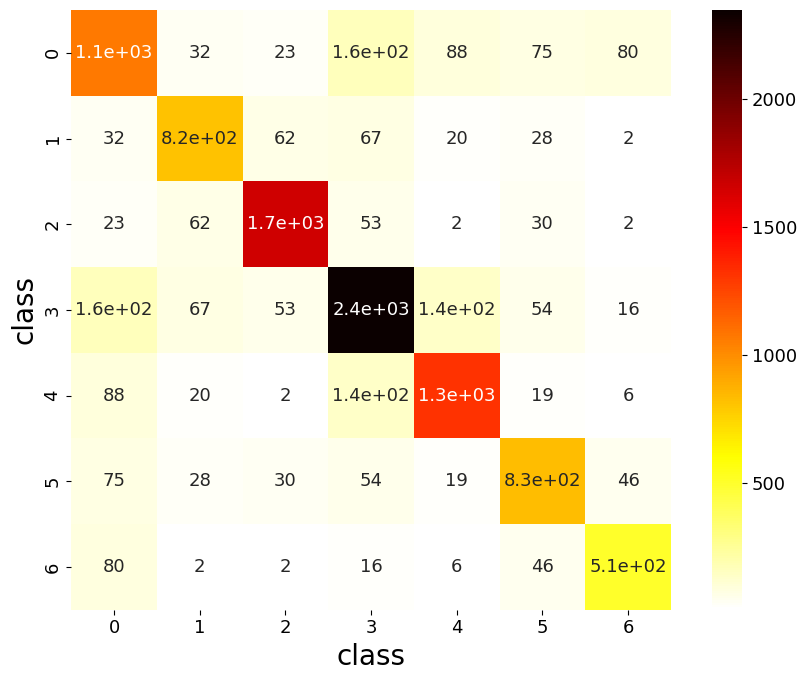

In [13]:


labels = data.y.numpy()
connected_labels_set = list(map(lambda x: labels[x], data.edge_index.numpy()))
connected_labels_set = np.array(connected_labels_set)
def add_missing_keys(counter, classes):
    for x in classes:
        if x not in counter.keys():
            counter[x] = 0
    return counter
label_connection_counts = []
for i in range(7):
    print(f"label: {i}")
    connected_labels = connected_labels_set[:, np.where(connected_labels_set[0] == i)[0]]
    print(connected_labels.shape[1], "edges")
    counter = collections.Counter(connected_labels[1])
    counter = dict(counter)
    print(counter)
    counter = add_missing_keys(counter, range(7))
    items = sorted(counter.items())
    items = [x[1] for x in items]
    label_connection_counts.append(items)
label_connection_counts = np.array(label_connection_counts)
plt.figure(figsize=(9, 7))
plt.rcParams["font.size"] = 13
hm = sns.heatmap(label_connection_counts, annot=True, cmap='hot_r', cbar=True, square=True)
plt.xlabel("class",size=20)
plt.ylabel("class",size=20)
plt.tight_layout()
plt.show()

In [14]:
label_connection_counts.diagonal().sum() / label_connection_counts.sum()

0.8099658961727927

81 percent of the edges are connected within the same class

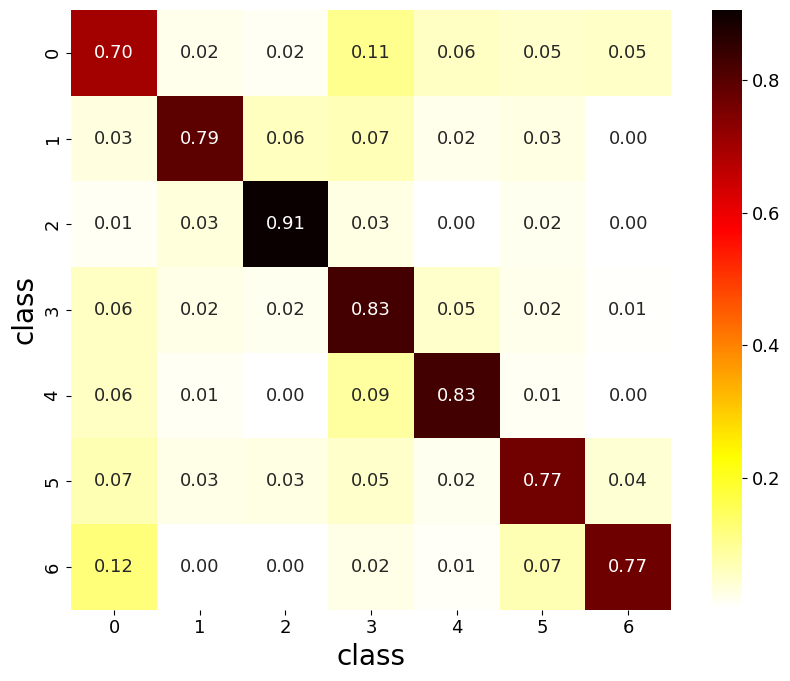

In [15]:
def scaling(array):
    return array / sum(array)
label_connection_counts_scaled = np.apply_along_axis(scaling, 1, label_connection_counts)
plt.figure(figsize=(9, 7))
plt.rcParams["font.size"] = 13
hm = sns.heatmap(
    label_connection_counts_scaled,
    annot=True,
    cmap='hot_r',
    fmt="1.2f",
    cbar=True,
    square=True)
plt.xlabel("class",size=20)
plt.ylabel("class",size=20)
plt.tight_layout()
plt.show()

Node embedding

Community detection and clustering

In [54]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.pyplot as plt
from collections import Counter

# Apply the Louvain method for community detection
communities = list(greedy_modularity_communities(G))

# Get the labels for each node
node_labels = dict(zip(data.y.numpy(), data.y.numpy()))

# Find the most frequent label for each community
community_labels = []
for community in communities:
    # Ensure that each node in the community has a corresponding label
    labels = [node_labels.get(node, None) for node in community]
    
    # Filter out None values (nodes without labels)
    labels = [label for label in labels if label is not None]

    # Check if there are any labels before finding the most frequent one
    if labels:
        most_frequent_label = Counter(labels).most_common(1)[0][0]
        community_labels.append(most_frequent_label)
    else:
        # Skip communities with no labeled nodes
        continue

# Print the most frequent label for each community
for i, label in enumerate(community_labels):
    print(f"Community {i+1}: Most Frequent Label - {label}")


Community 1: Most Frequent Label - 5
Community 2: Most Frequent Label - 0
Community 3: Most Frequent Label - 6
Community 4: Most Frequent Label - 1
Community 5: Most Frequent Label - 4
Community 6: Most Frequent Label - 3


Adjusted Rand Index: 0.08745414490623385


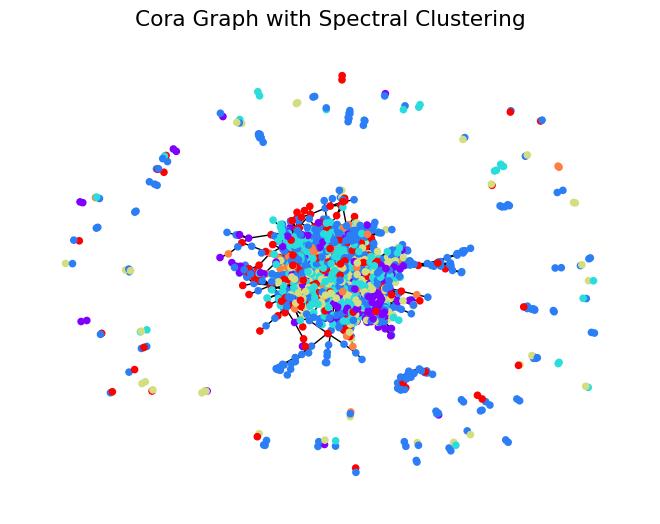

In [55]:
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score
from sklearn import datasets
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_networkx
import networkx as nx

# Number of clusters based on the unique labels in the dataset
num_clusters = len(np.unique(data.y.numpy()))

# Spectral clustering
spectral = SpectralClustering(n_clusters=num_clusters, affinity='nearest_neighbors')
labels = spectral.fit_predict(data.x.numpy())

# Evaluate clustering performance using Adjusted Rand Index
ari = adjusted_rand_score(data.y.numpy(), labels)
print(f"Adjusted Rand Index: {ari}")

# Visualize the graph with color-coded clusters
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=labels, cmap=plt.cm.rainbow, with_labels=False, node_size=20)
plt.title("Cora Graph with Spectral Clustering")
plt.show()


In [56]:
# Number of clusters based on the unique labels in the dataset
num_clusters = len(np.unique(data.y.numpy()))

# Spectral clustering
spectral = SpectralClustering(n_clusters=num_clusters, affinity='nearest_neighbors')
labels_spectral = spectral.fit_predict(data.x.numpy())

# Evaluate clustering performance using Adjusted Rand Index
ari_spectral = adjusted_rand_score(data.y.numpy(), labels_spectral)
print(f"Spectral Clustering Adjusted Rand Index: {ari_spectral}")

# Find the most frequent label for each cluster in spectral clustering
cluster_labels_spectral = {}
for cluster in range(num_clusters):
    cluster_indices = np.where(labels_spectral == cluster)[0]
    cluster_labels = data.y.numpy()[cluster_indices]
    most_frequent_label = Counter(cluster_labels).most_common(1)[0][0]
    cluster_labels_spectral[cluster] = most_frequent_label

# Print the most frequent label for each cluster in spectral clustering
print("Spectral Clustering - Most Frequent Label for Each Cluster:")
for cluster, label in cluster_labels_spectral.items():
    print(f"Cluster {cluster + 1}: Most Frequent Label - {label}")

# Compare with Louvain method
print("\nLouvain Method - Most Frequent Label for Each Community:")
for i, label in enumerate(community_labels):
    print(f"Community {i + 1}: Most Frequent Label - {label}")

Spectral Clustering Adjusted Rand Index: 0.08745414490623385
Spectral Clustering - Most Frequent Label for Each Cluster:
Cluster 1: Most Frequent Label - 3
Cluster 2: Most Frequent Label - 0
Cluster 3: Most Frequent Label - 3
Cluster 4: Most Frequent Label - 4
Cluster 5: Most Frequent Label - 3
Cluster 6: Most Frequent Label - 2
Cluster 7: Most Frequent Label - 3

Louvain Method - Most Frequent Label for Each Community:
Community 1: Most Frequent Label - 5
Community 2: Most Frequent Label - 0
Community 3: Most Frequent Label - 6
Community 4: Most Frequent Label - 1
Community 5: Most Frequent Label - 4
Community 6: Most Frequent Label - 3


Strengths and Weaknesses of Spectral Clustering:

Strengths:

Effectively handles non-convex shapes and captures complex relationships in data.
Utilizes eigenvalue decomposition for a global view of the data structure.
Weaknesses:

Requires tuning parameters like the number of clusters, affinity measure, leading to sensitivity.
Computational complexity, especially for large datasets due to eigenvector and eigenvalue computations.
Strengths and Weaknesses of Louvain Method:

Strengths:

Well-suited for detecting communities in networks, efficient for identifying densely connected nodes.
Demonstrates computational efficiency and scalability for large networks.
Weaknesses:

Sensitivity to initial conditions, with results depending on the algorithm's starting point.
Assumption of modularity, where community internal connectivity is presumed higher than external connectivity.
Comparison and Scenarios:

Spectral Clustering:

Preferred Scenarios: Suitable for datasets with complex structures and non-convex clusters, especially when a global view is crucial.
When to Choose: Opt for spectral clustering with small to moderate-sized datasets, particularly when eigenvalue decomposition represents the underlying structure well.
Louvain Method:

Preferred Scenarios: Well-suited for network data, social network analysis, and when detecting communities is a primary goal.
When to Choose: Choose the Louvain method for large-scale network data when identifying densely connected groups is essential.

In [59]:
from sklearn import preprocessing
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import accuracy_score
# Randomly select a small subset of nodes and assume their labels are known
np.random.seed(42)  # Set seed for reproducibility
num_known_nodes = 200  # Adjust the size based on your requirement
known_nodes = np.random.choice(G.nodes, size=num_known_nodes, replace=False)
known_labels = data.y.numpy()[known_nodes]

# Assume the remaining nodes have unknown labels
unknown_nodes = list(set(G.nodes) - set(known_nodes))

# Prepare the input features and labels for LBP
X = preprocessing.normalize(data.x.numpy(), norm='l1', axis=1)  # Normalize feature matrix
y = np.copy(data.y.numpy())
y[unknown_nodes] = -1  # Assign -1 to unknown labels

# Apply Label Propagation
lp = LabelPropagation(kernel='knn', n_neighbors=10, max_iter=100)
lp.fit(X, y)

# Predict labels for unknown nodes
predicted_labels = lp.transduction_[unknown_nodes]

# True labels for unknown nodes
true_labels = data.y.numpy()[unknown_nodes]

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 44.86%


C:\Users\thomas\anaconda3\envs\CORA\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:322: ConvergenceWarning: max_iter=100 was reached without convergence.
  warnings.warn(


In [60]:
# Define different proportions of nodes with known labels
proportions = [0.05, 0.1, 0.2, 0.5]

for proportion in proportions:
    # Randomly select nodes based on the specified proportion
    num_known_nodes = int(proportion * len(G.nodes))
    known_nodes = np.random.choice(G.nodes, size=num_known_nodes, replace=False)
    known_labels = data.y.numpy()[known_nodes]

    # Assume the remaining nodes have unknown labels
    unknown_nodes = list(set(G.nodes) - set(known_nodes))

    # Prepare the input features and labels for LBP
    X = preprocessing.normalize(data.x.numpy(), norm='l1', axis=1)  # Normalize feature matrix
    y = np.copy(data.y.numpy())
    y[unknown_nodes] = -1  # Assign -1 to unknown labels

    # Apply Label Propagation
    lp = LabelPropagation(kernel='knn', n_neighbors=10, max_iter=100)
    lp.fit(X, y)

    # Predict labels for unknown nodes
    predicted_labels = lp.transduction_[unknown_nodes]

    # True labels for unknown nodes
    true_labels = data.y.numpy()[unknown_nodes]

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f"Proportion of Known Nodes: {proportion * 100:.0f}%, Accuracy: {accuracy * 100:.2f}%")

C:\Users\thomas\anaconda3\envs\CORA\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:322: ConvergenceWarning: max_iter=100 was reached without convergence.
  warnings.warn(


Proportion of Known Nodes: 5%, Accuracy: 38.75%


C:\Users\thomas\anaconda3\envs\CORA\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:322: ConvergenceWarning: max_iter=100 was reached without convergence.
  warnings.warn(


Proportion of Known Nodes: 10%, Accuracy: 47.46%


C:\Users\thomas\anaconda3\envs\CORA\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:322: ConvergenceWarning: max_iter=100 was reached without convergence.
  warnings.warn(


Proportion of Known Nodes: 20%, Accuracy: 63.04%
Proportion of Known Nodes: 50%, Accuracy: 68.83%


Advantages and Disadvantages of Using Label Propagation for Node Classification in the Cora Citation Network:

Advantages:

Semi-Supervised Learning: Label Propagation allows for semi-supervised learning, making it suitable for scenarios where only a subset of nodes have labeled data. This is advantageous in situations where obtaining labeled data for the entire network is impractical.

Flexibility in Labeling: LBP provides flexibility in the labeling process, enabling the incorporation of partial or noisy labels. This is beneficial when dealing with real-world datasets where obtaining accurate labels for all nodes may be challenging.

Graph-Based Approach: LBP operates on the graph structure, leveraging the relationships between nodes. In the context of the Cora citation network, where nodes represent academic papers and edges represent citations, this approach aligns well with the inherent structure of scholarly connections.

Disadvantages:

Dependency on Initial Labels: LBP's performance can be sensitive to the initial labeling of nodes, impacting the accuracy of the final predictions. The method relies on the assumption that labeled nodes accurately represent their neighborhoods, which may not hold true in all cases.

Parameter Sensitivity: LBP involves tuning parameters such as the number of neighbors and the maximum iteration count. Selecting appropriate values for these parameters can be non-trivial and might require experimentation to achieve optimal results.

Limited Modeling of Node Features: LBP primarily relies on the graph structure and does not explicitly consider node features. In scenarios where node attributes play a crucial role in classification, methods that incorporate feature information more explicitly, such as machine learning models, may outperform LBP.

In summary, Label Propagation offers advantages in scenarios where only a fraction of nodes have labeled data and the graph structure plays a significant role in classification. However, its sensitivity to initial labels and parameter tuning, along with the limited consideration of node features, should be taken into account when applying LBP to node classification in the Cora citation network. Depending on the specific requirements of the task, alternative methods that address these limitations may be considered for more accurate and robust results.